In [1]:
import random as rd

Variant = 4
rd.seed(Variant)

list_struct = ["Очередь", "Массив"]
get_memory = ["Куча", "Анонимное отображение"]
list_func_array = ["Создание массива заданного размера","Заполнение случайными числами", "Нахождение суммы элементов массива", "Подсчет количества четных чисел", 
                   "Получение списка нечетных чисел", "Подсчет количества простых чисел", "Реверсирование элементов массива"]
list_func_quiuing = ["Добавление в конец","Удаление из начала", "Заполнение случайными числами", 
                     "Подсчет количества четных чисел", "Получение списка нечетных чисел", "Подсчет количества простых чисел", 
                    "Подсчет количества чисел, оканчивающихся на 1", 
                     "Удаление всех четных чисел (прочитанное нечетное число добавляется обратно в конец)"]

name_struct = rd.sample(list_struct,1)
name_get_memory = rd.sample(get_memory,1)
if name_struct == ["Очередь"]:
    list_action =[list_func_quiuing[0], list_func_quiuing[1], list_func_quiuing[2]]+rd.sample(list_func_quiuing[3:],3)
if name_struct == ["Массив"]:
    list_action =[list_func_quiuing[0], list_func_quiuing[1]]+rd.sample(list_func_quiuing[2:],3)
print("Структура: ", name_struct)
print("Метод выделения памяти: ", name_get_memory)
print("Список функций (действий): ", list_action);

Структура:  ['Очередь']
Метод выделения памяти:  ['Анонимное отображение']
Список функций (действий):  ['Добавление в конец', 'Удаление из начала', 'Заполнение случайными числами', 'Подсчет количества четных чисел', 'Подсчет количества чисел, оканчивающихся на 1', 'Получение списка нечетных чисел']


queue.asm

In [ ]:
format ELF64

section '.bss' writable
    head  rq 1
    tail  rq 1
    size  rq 1
    buffer rb 1
    f db "/dev/random", 0

section '.text' executable
    public init_queue
    public free_queue
    public q_push
    public q_pop
    public rand_fill
    public count_even_numbers
    public ends_with_one
    public count_odd

include 'func.asm'

init_queue:
    mov rbx, rdi
    imul rbx, 8
    mov [size],rbx

	mov rdi, 0
	mov rsi, rbx
	mov rdx, 0x3
	mov r10,0x22
	mov r8, -1
	mov r9, 0
	mov rax, 9
	syscall

    mov [head], rax
    mov [tail], rax
    ret


free_queue:
    mov rdi, [head]
    mov rsi, [size]
    mov rax, 11
    syscall
    ret

q_push:

    mov rbx, [tail]
    mov rcx, [head]
    add rcx, [size]


    cmp rbx, rcx
    jae .overflow


    mov [rbx], rdi
    add rbx, 8
    mov [tail], rbx

    mov rax, 0
    ret

.overflow:
    mov rax, -1
    ret

q_pop:
    mov rax, [head]
    mov rcx, [rax]
    push rcx
    xor rcx, rcx
    .loop:
        mov rbx, [rax+8]
        mov [rax], rbx

        add rax, 8
        add rcx, 8
        cmp rcx, [size]
        jl .loop
    pop rax
    ret

rand_fill:
    mov r8, rdi
    imul r8, 8
    add r8, [tail]
    mov rax, 2
    mov rdi, f
    mov rsi, 0o
    syscall
    mov r9, rax
    .loop:
    cmp r8, [tail]
    je .fin
    mov rax, 0
    mov rdi, r9
    mov rsi, buffer
    mov rdx, 1
    syscall
    xor rax, rax
    xor rdi, rdi
    mov al, byte[rsi]
    add rdi, rax
    call q_push
    jmp .loop
    .fin:
    mov rax, 3
    mov rdi, r9
    syscall
    ret

count_even_numbers:
    xor r8, r8                 
    mov r9, [head]           
.loop:
    cmp r9, [tail]           
    jge .fin
    mov rdi, [r9]             
    xor rdx, rdx              
    mov rcx, 2                
    div rcx                     
    cmp rdx, 0                 
    jne .not_even
    inc r8                    
.not_even:
    add r9, 8                  
    jmp .loop
.fin:
    mov rax, r8                
    ret


ends_with_one:
    xor r8, r8
    mov r9, [head]
    .loop:
    cmp r9, [tail]
    jge .fin
    xor rdx, rdx
    mov rax, [r9]
    mov rdi, 10
    div rdi
    add r9, 8
    cmp rdx, 1
    jne .loop
    inc r8
    jmp .loop
    .fin:
    mov rax, r8
    ret

count_odd:
    mov rbx, [head]
    xor r8, r8
    jmp .loop



    .loop:
    cmp rbx, [tail]
    jge .fin

    mov rax, [rbx]
    add rbx, 8
    xor rdx, rdx
    mov rcx, 2
    div rcx
    cmp rdx, 0
    je .loop
    inc r8
    jmp .loop

    .fin:
    mov rax, r8
    ret

main.c

In [ ]:
#include <stdio.h>
#include <stdlib.h>

extern long *init_queue();
extern long *free_queue();
extern long q_push(long);
extern long q_pop();
extern void rand_fill(long);
extern long count_even_numbers();
extern long ends_with_one();
extern long count_odd();

int main() {
  long *arr, n, cap;
  scanf("%ld", &n);
  arr = init_queue(n);
  if (arr == NULL) {
    fprintf(stderr, "Ошибка выделения памяти\n");
    return 1;
  }

  cap = 5;
  rand_fill(cap);

  for (int i = 0; i < cap; i++) {
    printf("%ld\n", arr[i]);
  }

  printf("even=%ld ones=%ld odd=%ld\n\n", count_even_numbers(),
         ends_with_one(), count_odd());

  for (int i = cap; i < n; i++) {
    q_push(i);
  }

  for (int i = 0; i < n; i++) {
    printf("%ld\n", arr[i]);
  }

  printf("poped=%ld\n", q_pop());
  printf("poped=%ld\n", q_pop());

  free_queue();

  return 0;
}


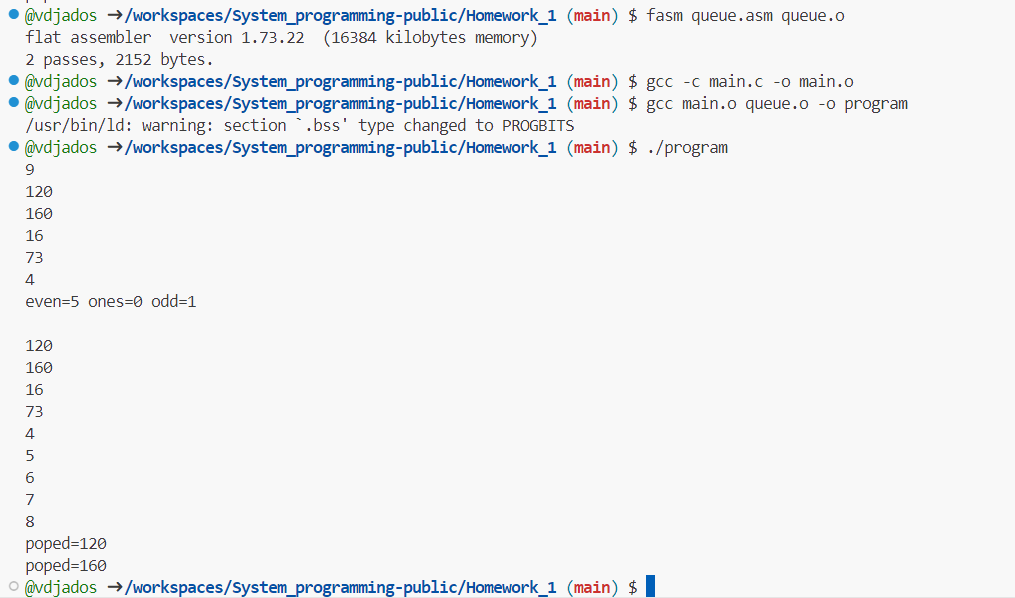